<a href="https://colab.research.google.com/github/SpreeC/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
  - Cheyenne Cantwell

##Project Overview

##Load and Inspect Data

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Save the filepath and load the data as "df"
fname = '/content/drive/MyDrive/Coding Dojo/01-Fundementals/sales_predictions_2023.csv'
df = pd.read_csv(fname)

In [4]:
#preview first rows of data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#preview summary of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

######1) How many rows and columns?

In [6]:
#rows and columns
df.shape

(8523, 12)

######2) What are the datatypes of each variable?

In [7]:
#datatypes of column names
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Use .select_dtypes to view only object columns to see if any objects need to be converted to numbers
df.select_dtypes('O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


######3) Are there duplicates? If so, drop any duplicates.

In [9]:
#find duplicates
df.duplicated().sum()

0

######4) Identify missing values.

In [10]:
#find missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

######5) Address the missing values by using a placeholder value.

In [11]:
# save list of categorical column name
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [12]:
# use the list of cat columns to fill null values with MISSING
df[cat_cols] = df[cat_cols].fillna('MISSING')
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [13]:
# save list of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna(-1)
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

######6) Confirm that there are no missing values after addressing them.

In [15]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

######7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [16]:
# find inconsistencies in categories
for col in cat_cols:
  print(f'Value counts for {col}:')
  print(df[col].value_counts())
  print('\n')

Value counts for Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    

In [17]:
#replace low fat with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [18]:
#replace LF with Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [19]:
#replace reg with Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

######8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [20]:
#obtain min, max, and mean for numerical columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

####Create a Countplot to view the frequency of each class of categorial features in the dataset.

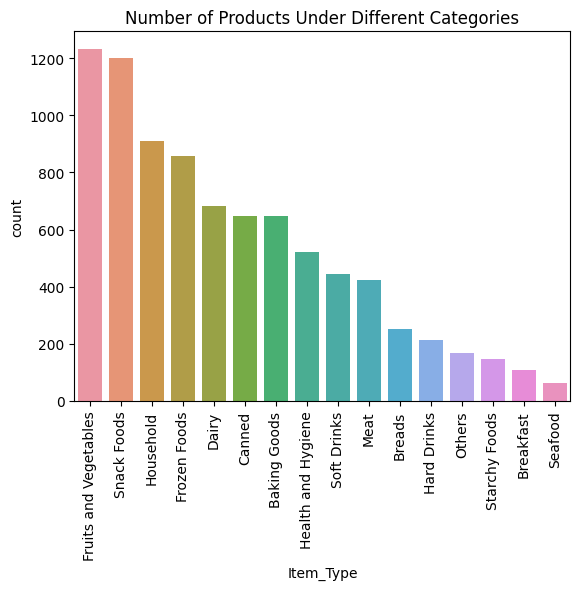

In [21]:
#Define the label order
label_order = df['Item_Type'].value_counts().index
#create a countplot with x='Item_Type' and order it
ax = sns.countplot(data=df, x="Item_Type", order=label_order)
#fix rotation of item types
ax.tick_params(axis='x', rotation = 90);
#set the title
ax.set_title('Number of Products Under Different Categories');

#####Through this visualization we can see that fruits and vegetables have the most amount of different products sold while seafood has the least amount of different products sold

####Create a Histogram to view the distributions of numerical features in the dataset.

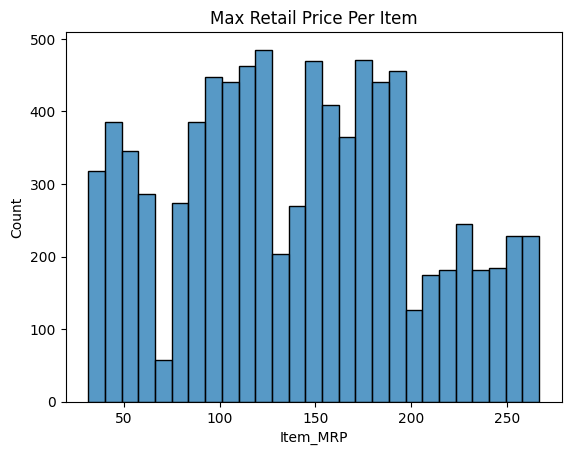

In [22]:
#create a Histogram with x='Item_MRP'
ax=sns.histplot(data=df, x='Item_MRP')
#title the histogram
ax.set_title('Max Retail Price Per Item');

#####Through this visualization we can see that the max retail price per item does not exceed $300

####Create a Barplot to compare a numerical value to a categorical value

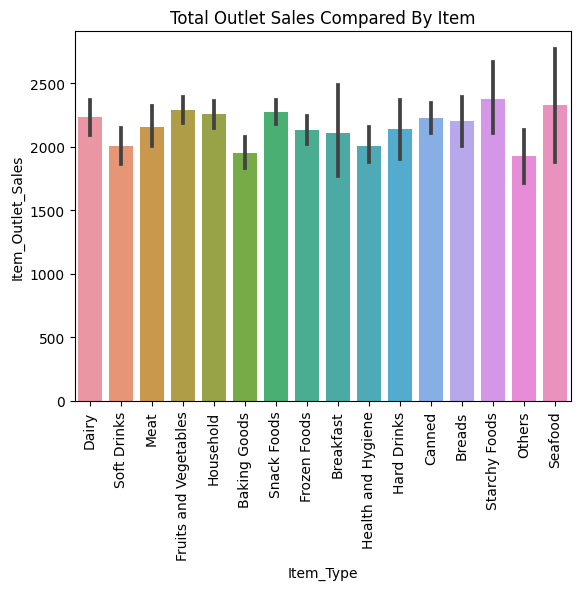

In [23]:
#create a Barplot with x='Item_Type', y='Item_Outlet_Sales'
ax=sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
#fix rotation
ax.tick_params(axis='x', rotation = 90);
#set title
ax.set_title('Total Outlet Sales Compared By Item');

#####Through this visualization we can see (without looking at the error bars) that Starchy Foods have the most sales while Others have the least

####Creat a Boxplot to view a statistical summary of a numerical feature in the dataset.

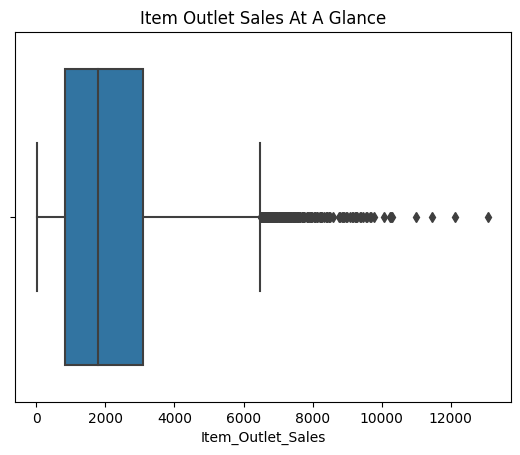

In [24]:
#create a boxplot with x='Item_Outlet_Sales'
ax=sns.boxplot(data=df, x='Item_Outlet_Sales')
#set title
ax.set_title('Item Outlet Sales At A Glance');

#####Through this visualization we can see that the median outlet sales falls just below 2000, but we have many outliers including a couple that go over 12,000

####Create a Heatmap to view the correlation between features.

In [25]:
#Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


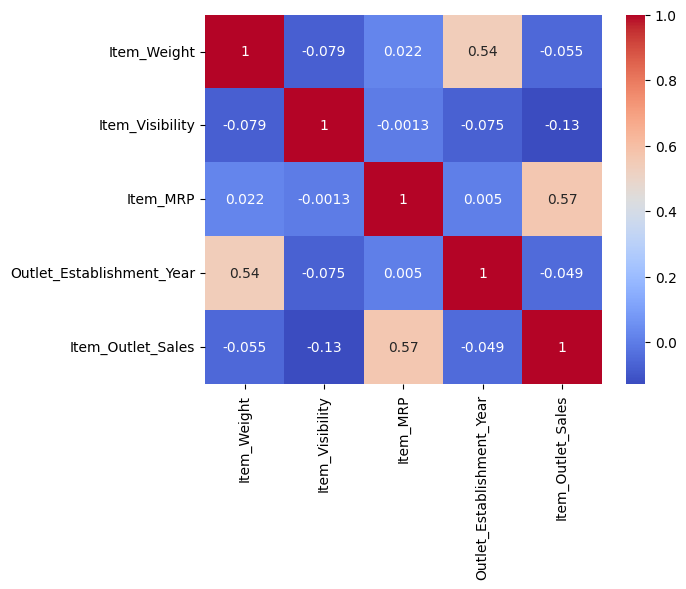

In [26]:
#create a Heatmap with coolwarm colors
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

#####Through this visualization we can see that Item_MRP and Item_Outlet_Sales have a positive correlation; and Item_Visibility and Item_Outlet_Sales have a negative correlation

####Create an scatterplot to view the correlation between two features

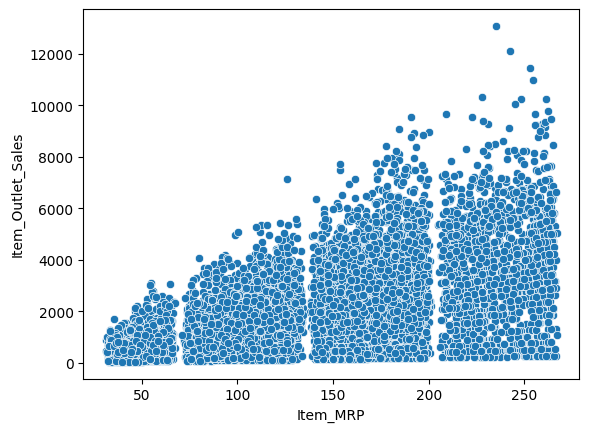

In [27]:
#create an scatterplot with x='Item_MRP', y='Item_Outlet_Sales'
ax=sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')

#####This visualization gives us more detail into the positive correlation of Item_MRP and Item_Outlet_Sales

##Feature Inspection

###Remove placeholders and replace with null values

In [28]:
#Replace MISSING with nulls
df = df.replace('MISSING', np.nan)
#check that there are nulls
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
#replace -1 with nulls
df = df.replace(-1, np.nan)
#check that there are nulls
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###Inspecting Item_Weight
- Weight of product

In [30]:
#Confirm the dtype to select correct EDA function
df['Item_Weight'].dtype

dtype('float64')

####Univariate Viz

In [31]:
#Create custom function for the univariate visualization showing the distibution of values
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

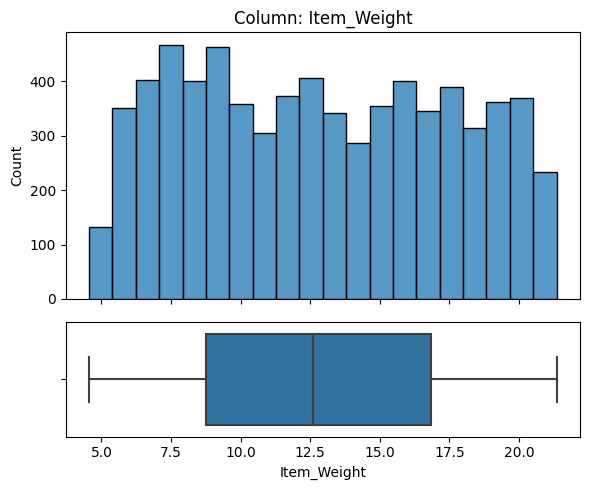

- NaN's Found: 1463 (17.17%)


In [32]:
#Create a univariate visualization showing the distribution of values.
explore_numeric(df, 'Item_Weight');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage?
  - 1463 null values (17.17%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There is only 17.17% of missing values, so I would impute those values with the median number.
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - Not Applicable (numeric feature)
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - Yes, Item weight would most likely not affect the sales of an item.

####Multivariate Viz

In [33]:
#Create a custom function for a multivariate visualization plotting the feature vs. the target
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

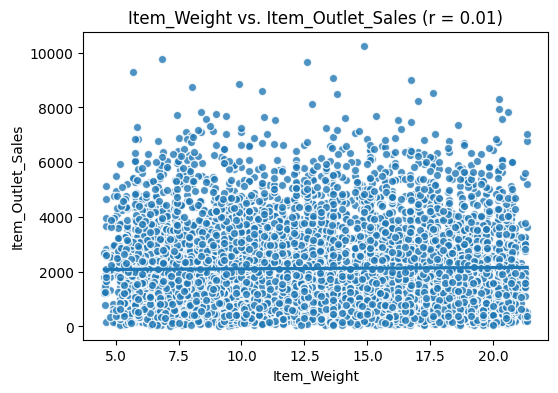

In [34]:
#Create a multivariate visualization plotting each feature vs. the target.
plot_numeric_vs_target(df, 'Item_Weight');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, Item weight should have no affect on whether a person would purchase a product or not.
- Does this feature appear to be a predictor of the target?
  - No, our trendline is almost horizontal, indicating there is no correlation between the two.

###Inspecting Item_Fat_Content
- Whether the product is low-fat or regular

In [35]:
#Confirm the dtype to select correct EDA function
df['Item_Fat_Content'].dtype

dtype('O')

####Univariate Viz

In [36]:
#Create a custom function for a univariate visualization showing the distribution of categories
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
    return fig, ax

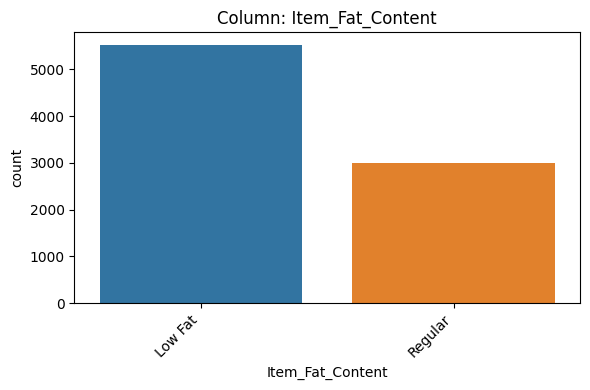

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [37]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Item_Fat_Content');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical Nominal
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - No, there are only 2 unique columns
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, Item Fat Content could be a determination in whether or not a customer would buy an item or not.

####Multivariate Viz

In [38]:
#Create a custom function for a multivariate visualization plotting the feature vs. the target
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

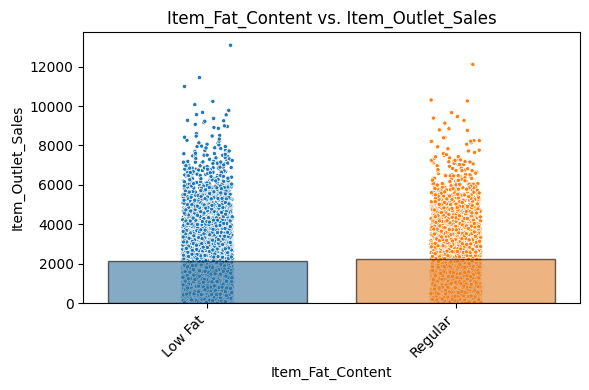

In [39]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Item_Fat_Content');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, most consumers have a preference on whether they would want a regular or low-fat product.
- Does this feature appear to be a predictor of the target?
  - According to the visualization there does not seem to be much difference between the low-fat and regular so it is difficult to say. I would say it depends on other factors, such at outlet location, outlet type, item visibility, and item price.

###Inspecting Item_Visibility
- The percentage of total display area of all products in a store allocated to the particular product

In [40]:
#Confirm the dtype to select correct EDA function
df['Item_Visibility'].dtype

dtype('float64')

####Univariate Viz

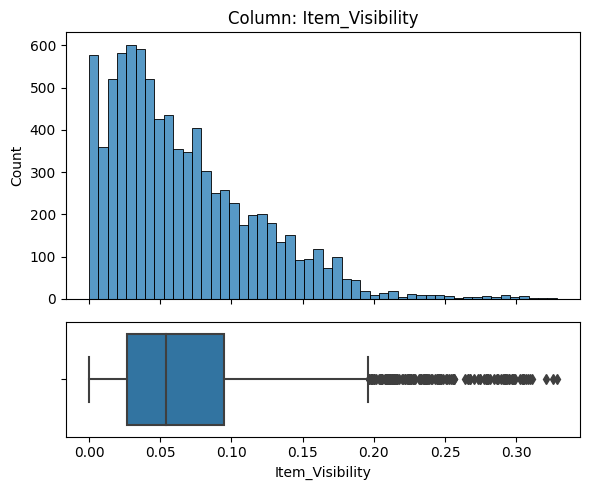

- NaN's Found: 0 (0.0%)


In [41]:
#Create a univariate visualization showing the distribution of values.
explore_numeric(df, 'Item_Visibility');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -Numeric
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - Not Applicable
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, usually when a product is highly visible a consumer is more likely to buy it.

####Multivariate Viz

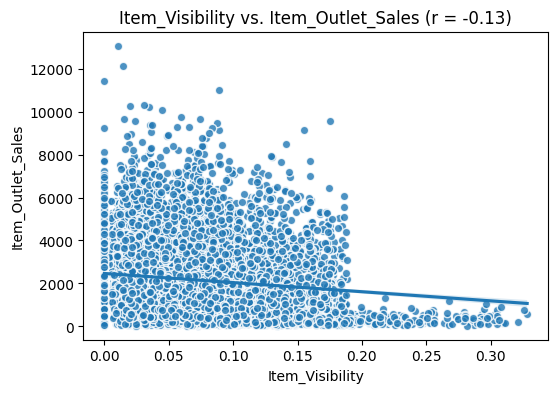

In [42]:
#Create a multivariate visualization plotting each feature vs. the target.
plot_numeric_vs_target(df, 'Item_Visibility');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, from my understanding the more visible something is the more chances the consumer has of seeing the item and potentially buying it.
- Does this feature appear to be a predictor of the target?
  - From this visualization we can see that the more visible a product is it stays under a certain threshold of sales and so this means that it could be a predictor in that as long as item visibility stays under .20% then the item is more likely to have more sales.

###Inspecting Item_Type
- The category to which the product belongs

In [43]:
#Confirm the dtype to select correct EDA function
df['Item_Type'].dtype

dtype('O')

####Univariate Viz

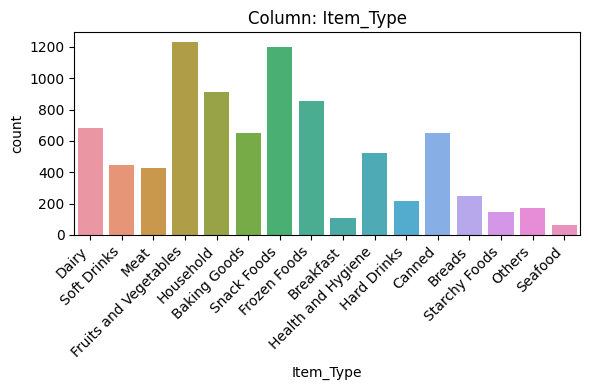

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [44]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Item_Type');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Nominal)
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - Yes, 16 columns
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, Item type  helps a consumer figure out whether or not they would buy an item.

####Multivariate Viz

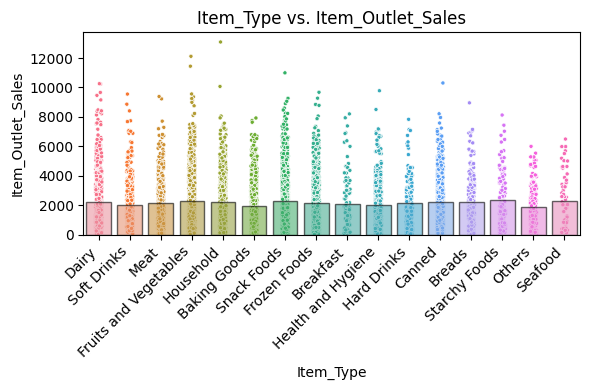

In [45]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Item_Type');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, for a consumer knowing the item type of an item helps them figure out what store they need to go to and can help in knowing what isle to get the item in which could effect whether or not they buy the item as some consumers may not want to buy something they have a hard time finding.
- Does this feature appear to be a predictor of the target?
  - Looking at this visualization all of the item types seem to be pretty even and so at first glance this does not look likte and indicator, but I believe it would also depend on other features such as item price, item visibility, outlet type, and outlet location.

###Inspecting Item_MRP
- Maximum Retail Price (list price) of the product

In [46]:
#Confirm the dtype to select correct EDA function
df['Item_MRP'].dtype

dtype('float64')

####Univariate Viz

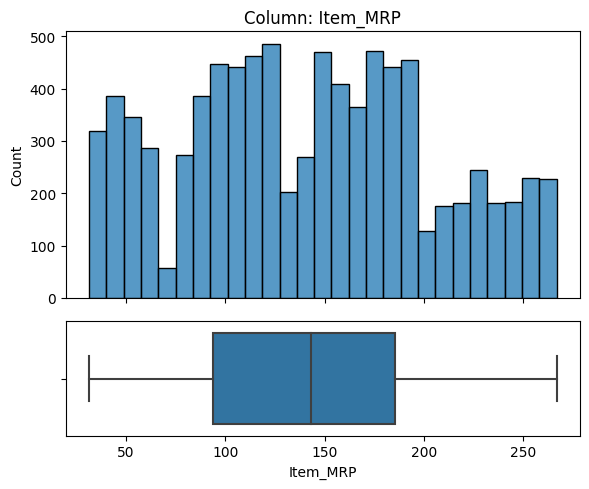

- NaN's Found: 0 (0.0%)


In [47]:
#Create a univariate visualization showing the distribution of values.
explore_numeric(df, 'Item_MRP');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - Not Applicable
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, item price helps a consumer figure out whether they would buy an item or not.

####Multivariate Viz

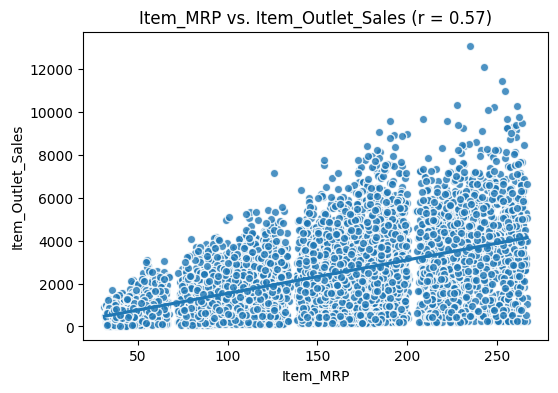

In [48]:
#Create a multivariate visualization plotting each feature vs. the target.
plot_numeric_vs_target(df, 'Item_MRP');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, the higher priced an item is means it can contribute to the overall sales more.
- Does this feature appear to be a predictor of the target?
  - Yes, from this visualization we can see that the higher the item price is the higher the total sales are.

###Inspecting Outlet_Identifier
- Store ID

In [49]:
#Confirm the dtype to select correct EDA function
df['Outlet_Identifier'].dtype

dtype('O')

####Univariate Viz

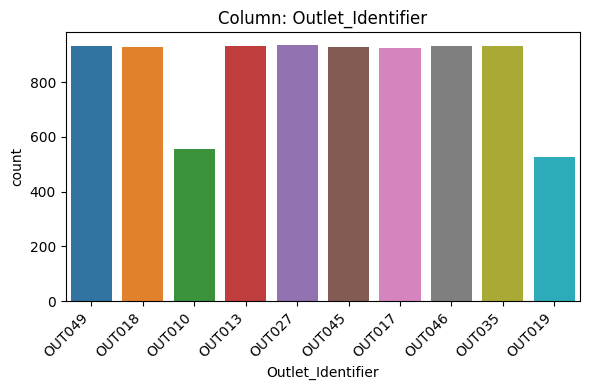

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [50]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Outlet_Identifier');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Ordinal)
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - 10, No
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - Yes, this should have no correlation with the target.

####Multivariate Viz

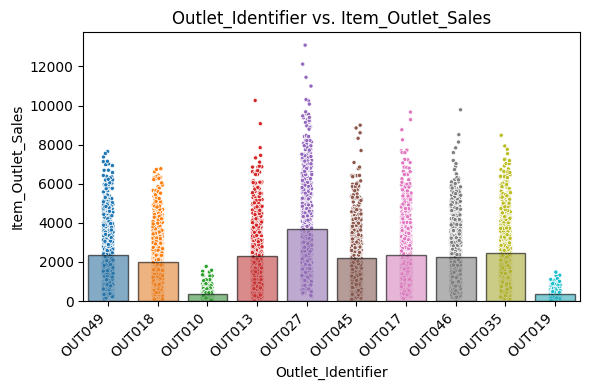

In [51]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Outlet_Identifier');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, as an identifier should have no affect on sales.
- Does this feature appear to be a predictor of the target?
  - From the visualization, yes it does appear to have some sort of correlation as we can see some outlets have higher sales than others.

###Inspecting Outlet_Establishment_Year
- The year in which store was established

In [52]:
#Confirm the dtype to select correct EDA function
df['Outlet_Establishment_Year'].dtype

dtype('int64')

####Univariate Viz

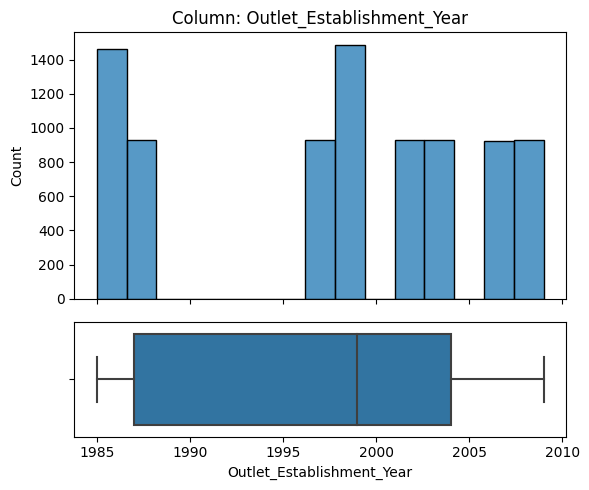

- NaN's Found: 0 (0.0%)


In [53]:
#Create a univariate visualization showing the distribution of values.
explore_numeric(df, 'Outlet_Establishment_Year');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - Not Applicable
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - Yes, the year an outlet was established should have no correlation on the target.

####Multivariate Viz

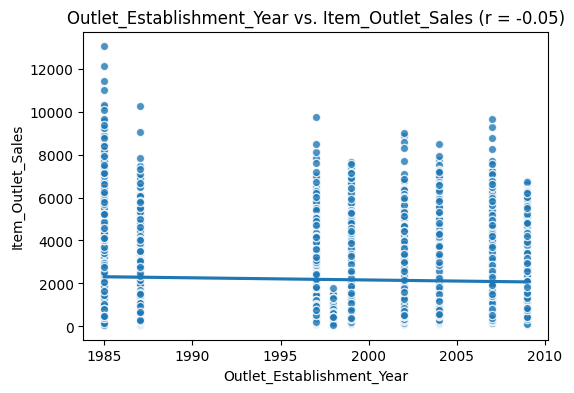

In [54]:
#Create a multivariate visualization plotting each feature vs. the target.
plot_numeric_vs_target(df, 'Outlet_Establishment_Year');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No, they should have no correlation with each other.
- Does this feature appear to be a predictor of the target?
  -  No, the trendline in this visualization is almost horizontal which means the two have no correlation with each other.

###Inspecting Outlet_Size
- The size of the store in terms of ground area covered

In [55]:
#Confirm the dtype to select correct EDA function
df['Outlet_Size'].dtype

dtype('O')

####Univariate Viz

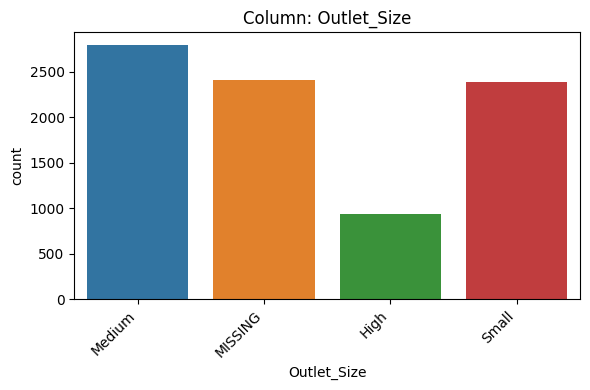

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [56]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Outlet_Size');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Ordinal)
- How many null values? What percentage?
  - 2410 (28.28%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Since it is missing 28.28% of the data I will impute the nulls with NA
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - No, 4
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, outlet siz could directly affect the target because the bigger an oulet is, the more items it has in it and the more likely it is to sell more items.

####Multivariate Viz

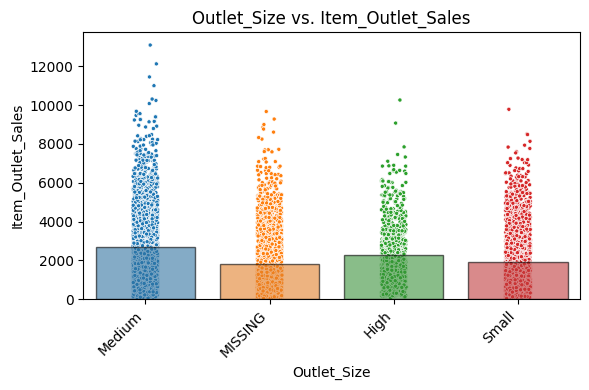

In [57]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Outlet_Size');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, the larger an outlet, the more items it has to sell, and so it has a higher probability of selling more items than a smaller outlet.
- Does this feature appear to be a predictor of the target?
  - Yes it somewhat appears to be a predictor as we can see in the visualization that medium sized outlet actually have the most sales and if we ignore the missing we can see that small outlets have the least amount of sales.

###Inspecting Outlet_Location_Type
- The type of area in which the store is located

In [58]:
#Confirm the dtype to select correct EDA function
df['Outlet_Location_Type'].dtype

dtype('O')

####Univariate Viz

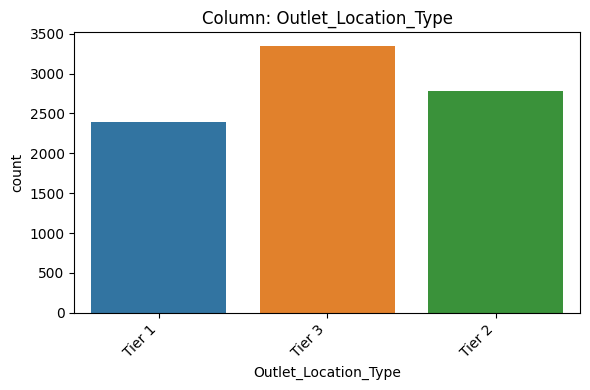

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [59]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Outlet_Location_Type');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Ordinal)
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - No, 3
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, location type could have an affect of sales, like an outlet in a city is more likely to make more sales than one in a rural area based off of population.

####Multivariate Viz

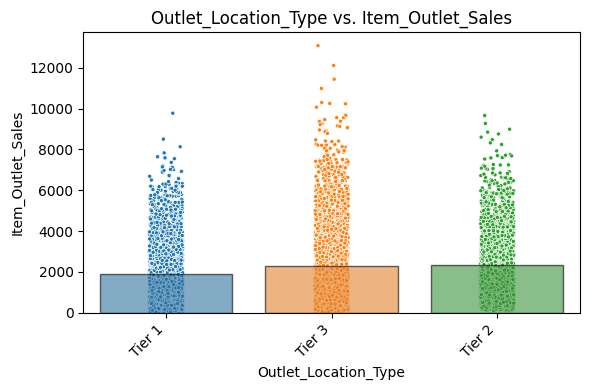

In [60]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Outlet_Location_Type');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, an outlet in the city is more likely to have more sales than one in a rural area, this is because a larger population is more likely to lead to more sales.
- Does this feature appear to be a predictor of the target?
  - Yes, through this visualization we can see that tier 1 has the lowest amount of sales and tier 3 has the most amount of sales.

###Inspecting Outlet_Type
- Whether the outlet is a grocery store or some sort of supermarket

In [61]:
#Confirm the dtype to select correct EDA function
df['Outlet_Type'].dtype

dtype('O')

####Univariate Viz

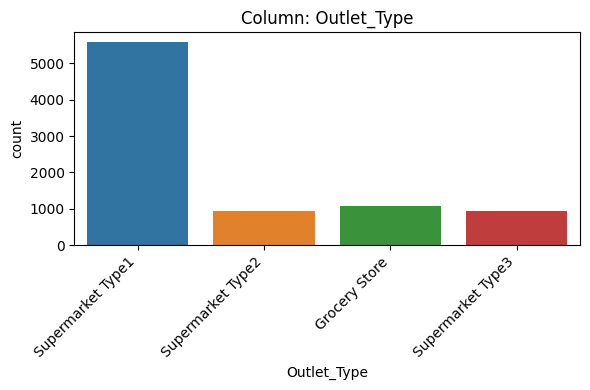

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [62]:
#Create a univariate visualization showing the distribution of categories.
explore_categorical(df, 'Outlet_Type');

####Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Nominal)
- How many null values? What percentage?
  - 0 (0%)
- What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - Not Applicable
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - No, 4
- Would we know this feature before the target is  determined?
  - Yes
- Is there a business case/understanding reason to  exclude based on our business case?
  - No, the type of store could have an affect on our target because the type of store is an indicator in whether a consumer would use that store to buy a certain product and the type of store could have a certain amount of items which could affect how much is made at that store.

####Multivariate Viz

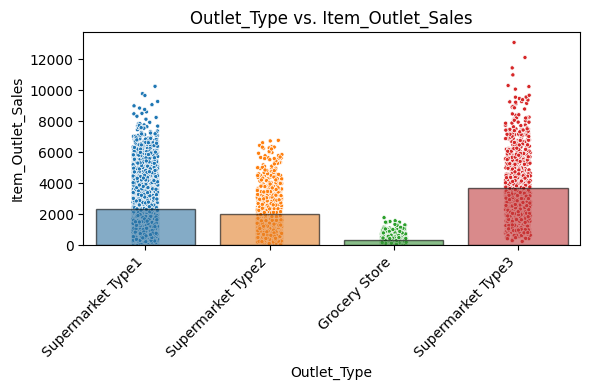

In [63]:
#Create a multivariate visualization plotting the feature vs. the target.
plot_categorical_vs_target(df, 'Outlet_Type');

####Observations
- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes, different types of outlets house different products and even different amounts of product.
- Does this feature appear to be a predictor of the target?
  - Yes, from the visualization we can see that grocery stores have the least amount of sales while type 3 has the most amount of sales.

#Pre-processing for Machine Learning

##Add new imports and read uncleaned data

In [64]:
# Model Validation Train Test Spit
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline

#  SK Learn Display
from sklearn import set_config
set_config(transform_output='pandas')

In [65]:
#load uncleaned data as mldf for machine learning dataframe
mldf = pd.read_csv(fname)
mldf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
#check the info
mldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##clean data for machine learning

###Drop Item_Identifier because it has high cardinality

In [67]:
mldf = mldf.drop(columns=['Item_Identifier'])
mldf.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Drop duplicate rows

In [68]:
#check for duplicate rows
mldf.duplicated().sum()

0

###Check for inconsistent categories

In [69]:
# save list of categorical column name
object_cols = mldf.select_dtypes('object').columns
object_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [70]:
# find inconsistencies in categories
for col in object_cols:
  print(f'Value counts for {col}:')
  print(mldf[col].value_counts())
  print('\n')

Value counts for Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value counts for Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value counts for Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Si

In [71]:
#replace low fat with Low Fat
mldf['Item_Fat_Content'] = mldf['Item_Fat_Content'].replace({'low fat':'Low Fat'})
mldf['Item_Fat_Content'].value_counts()

Low Fat    5201
Regular    2889
LF          316
reg         117
Name: Item_Fat_Content, dtype: int64

In [72]:
#replace LF with Low Fat
mldf['Item_Fat_Content'] = mldf['Item_Fat_Content'].replace({'LF':'Low Fat'})
mldf['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [73]:
#replace reg with Regular
mldf['Item_Fat_Content'] = mldf['Item_Fat_Content'].replace({'reg':'Regular'})
mldf['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Check for inconsistent numbers

In [74]:
#make sure nothing is too drastic like negative numbers or something way too high
mldf.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##pre-processing for machine learning

####Define features and target and train test split

In [75]:
# Define features and target
X = mldf.drop(columns = 'Item_Outlet_Sales')
y = mldf['Item_Outlet_Sales']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

####Create a pipeline for odrinal

In [76]:
#Check the array to create the ordinal scale
mldf['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [77]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Small', 'Medium', 'High']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

####Create a tuple for Ordinal

In [78]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

####Create a pipeline for categorical

In [79]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

####Create a tuple for categorical

In [80]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

####Create a pipeline for numerical

In [81]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

####Create a tuple for numerical

In [82]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

####Use tuples to create a column transformer

In [83]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

####Fit the column transformer on the training data

In [84]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

####Transform the data

In [85]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [86]:
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.341372,-0.776646,-0.998816,-1.293807,1.760619,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2957,-1.169135,0.100317,-1.585194,-0.102145,-0.264370,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7031,0.388798,-0.482994,-1.595784,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.049889,-0.415440,0.506592,-1.532139,0.748125,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
856,-0.632039,-1.047426,0.886725,0.732018,-0.264370,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
